Module pour améliorer la qualité de nos graphs !

# Les bases

## Importation de Matplotlib

Comme les autres librairies que vous avez commencé à utiliser il existe une convention pour importer matplotlib 

In [1]:
# convention d'importation de matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

# convention d'importation de numpy
import numpy as np

In [2]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

Il existe plusieurs moteurs de rendu des graphiques. Vous pouvez vérifier le backend à l'aide de la function ``plt.get_backend()``.

**Sur des Jupyter Notebook, il est conseillé de bosser avec le backend inline.** Pour l'activer, il faut utiliser la magic function suivante : 

```python
%matplotlib inline
```

In [3]:
# TODO activer inline et vérifer le backend

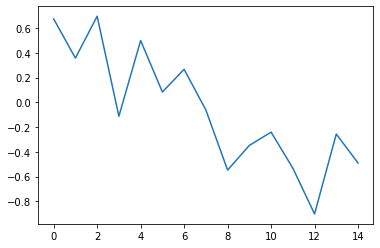

In [4]:
# Realiser un premier graphique !
x = np.random.randn(15).cumsum()
plt.plot(x)

## Structure d'un plot

Avant de continuer, il est très important de comprendre comment un plot est structuré. Il existe 2 notions à bien comprendre : 

- la `figure` : votre canvas pour dessiner  
- les `axes` : un espace du canvas pour plotter vos données 


Attention à ne pas confondre `axis` (les axes en francais) avec `axes`


![struct](https://res.cloudinary.com/practicaldev/image/fetch/s--dNi3F76s--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/rr39m52m6peef1drke7m.png)


**Il existe deux interfaces pour plotter avec la librairie matplotlib** :

- Une interface simplifié : à l'aide `pyplot` qui se rapproche à Matlab 
- Une interface orientée objet : aussi appellé interface Artist, qui permet d'avoir une meilleur granularitée pour faire des plots avancés.

**Nous allons explorer ces deux interfaces. Mais avant de commencer, je vous conseille de vous impregner du vocabulaire liée un plot :**

![vocab](https://res.cloudinary.com/practicaldev/image/fetch/s--1x1epD95--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/b9psb0mtz7yk8qmfe26f.png)

# Plotter à l'aide de l'interface PyPlot

## Exercise 1 - Tracer une ligne

Utiliser `pyplot` afin de créer un graphique qui ressemble à la figure ci dessous:

![exo1](ex1.png)


**Attention l'objectif n'est pas de reproduire la courbe, mais de mettre en place tous les composants et le style.**

<img src="img/ex1.png" />

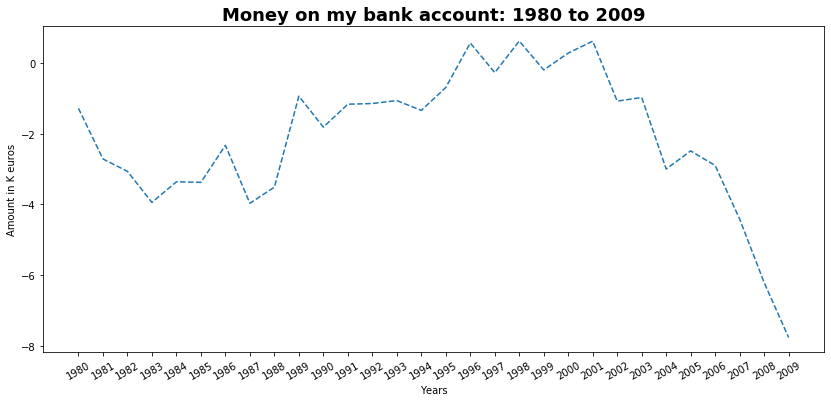

In [5]:
# Exo1 - Help 

# voici la variable à plotter
x = np.random.randn(30).cumsum()
years=list(range(1980,2010,1))

# la taille de la figure est (14,6)
# la couleur de la ligne a le code RGB : #5445BA
# Pour le titre la fontsize=18, fontweight="bold"
# Les labels des ticks sont en rotation de 90 degrées.
fig = plt.figure(figsize=(14,6))

plt.plot(x,ls='dashed')
plt.xlabel('Years')
plt.ylabel('Amount in K euros')
# plt.tick_params(axis='x',direction='out',rotation=90)


plt.xticks(np.arange(30), np.arange(1980, 2010, 1), rotation=390)
plt.title('Money on my bank account: 1980 to 2009',fontsize=18, fontweight="bold")


plt.show()

## Exercise 2 - Tracer un histogramme

A l'aide de la fonction `plt.hist()` tracez un histogramme qui resemble (dans sa structure) à l'image suivante.

![exo2](ex2.png)

<img src="img/ex2.png" />

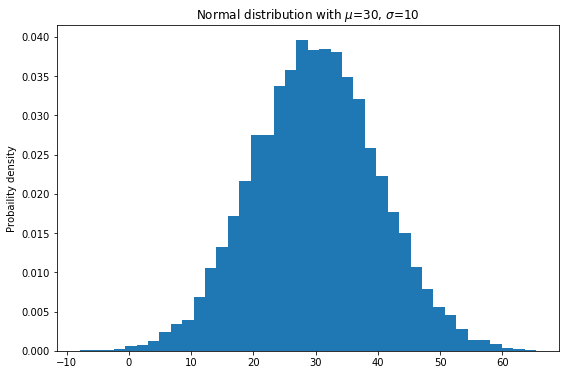

In [6]:
# Help exo 2

# add mu and sigma to x
x = np.random.randn(10000) *10 +30


fig = plt.figure(figsize=(9,6))
plt.hist(x,density=True,bins=40,label='Tirage aléatoire de X')
# plt.bar(np.arange(100),x)
plt.title('Normal distribution with $\mu$=30, $\sigma$=10')
# plt.legend()
plt.ylabel('Probaility density')
# plt.xticks(np.arange(10), np.arange(-10, 80, 10))
plt.show()

# figsize=(9,6)
# histogramme avec 40 bins. y présente la densité au lieu des valeurs !
# n'oublies pas la legende !!

(array([  15.,  146.,  680., 1968., 3024., 2605., 1182.,  324.,   50.,
           6.]),
 array([-6.33409188, -4.36254109, -2.39099029, -0.41943949,  1.5521113 ,
         3.5236621 ,  5.49521289,  7.46676369,  9.43831448, 11.40986528,
        13.38141608]),
 <a list of 10 Patch objects>)

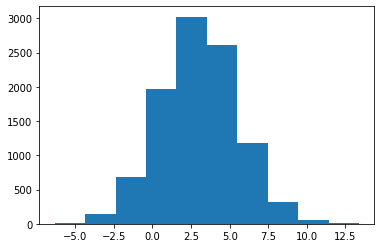

In [7]:
plt.hist(2.5 * np.random.randn(10000) + 3)

# Interlude : styles et parametrage

## Exercise 3 - Essayer autres styles


Il existe plusieurs styles graphiques pour le rendu de vos plots. Vous pouvez les connaitre à l'aide de l'attribut `plt.style.available` 

Essayer differents styles backend et observez les résultats sur la cellule ci dessous. 

Voici un exemple de rendu avec le style `seaborn` :

![exo3](ex3.png)

Un des principes de la visualisation est : **less is more**

**Quel style vous semble rendre le graphique moins chargé,  donc plus lisible ?**

<img src='img/ex3.png'>

In [94]:
styles=plt.style.available

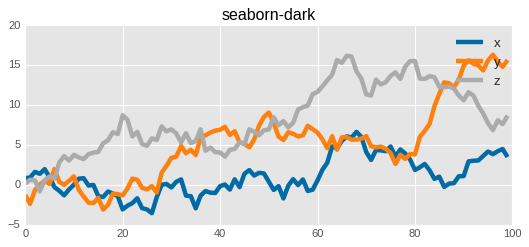

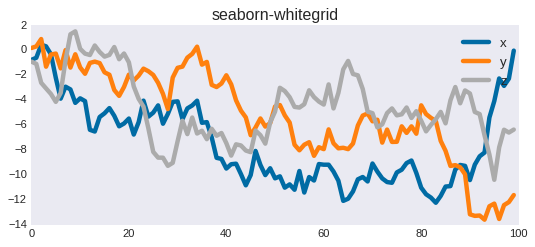

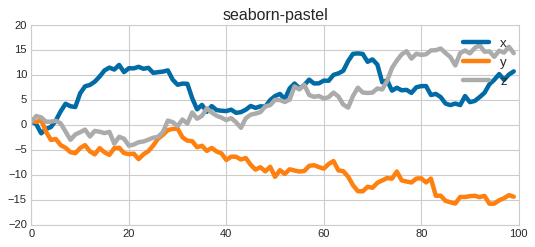

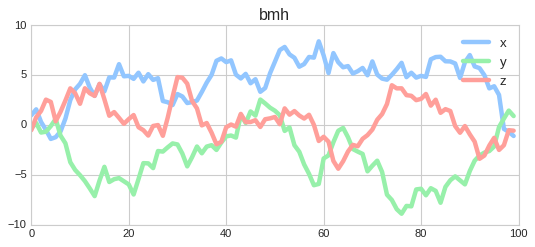

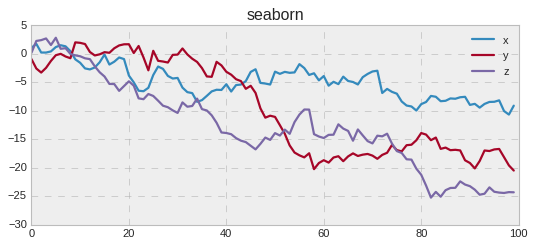

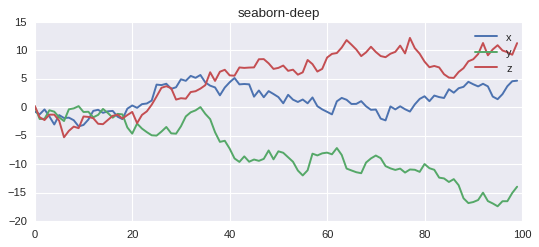

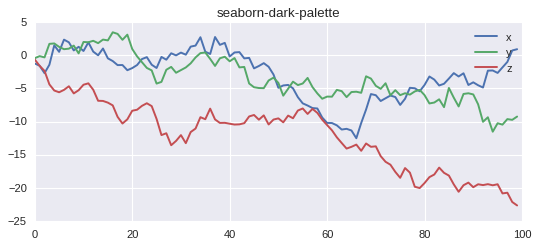

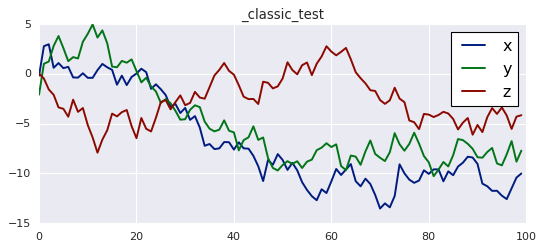

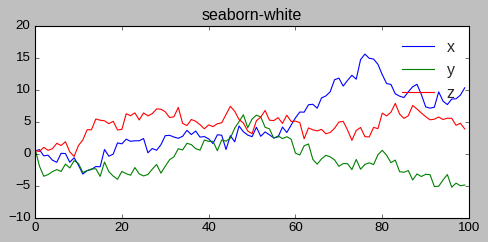

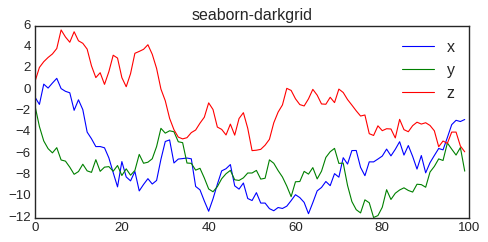

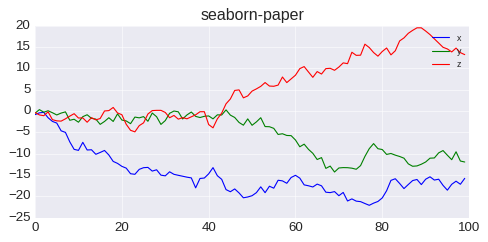

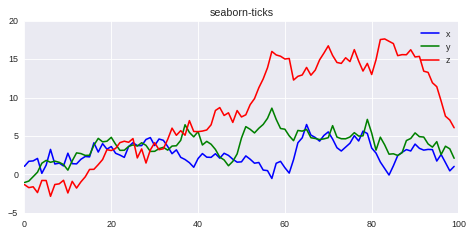

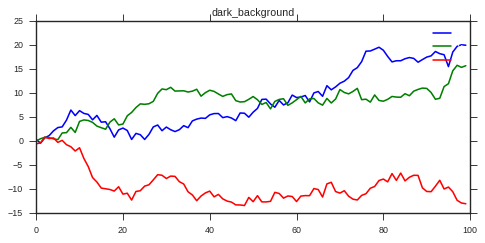

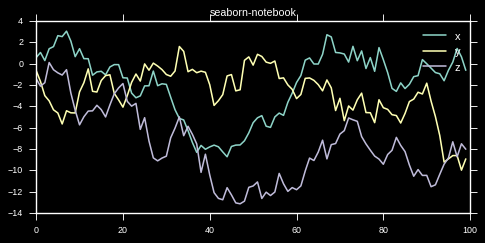

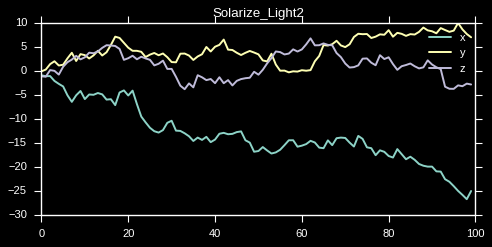

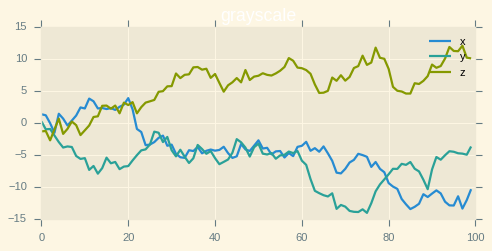

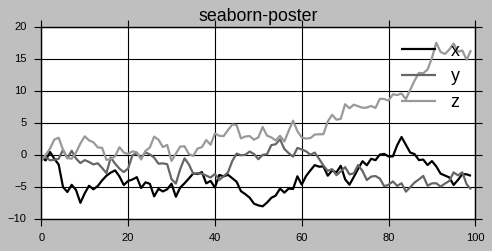

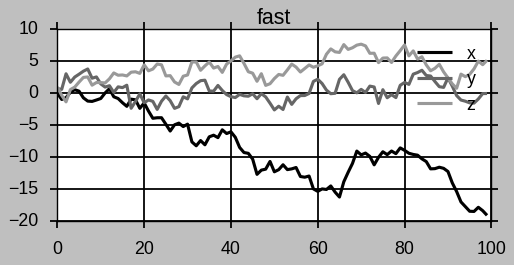

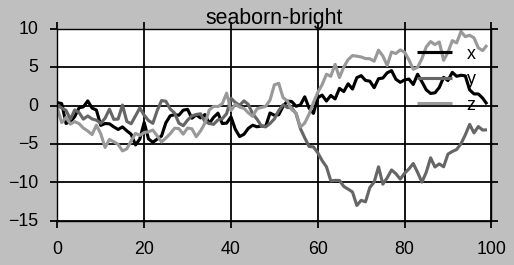

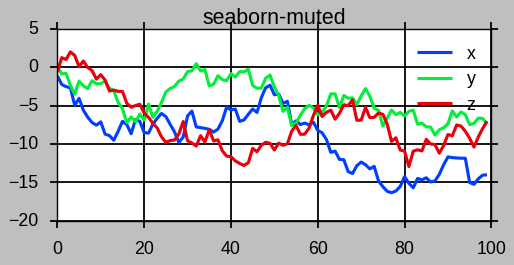

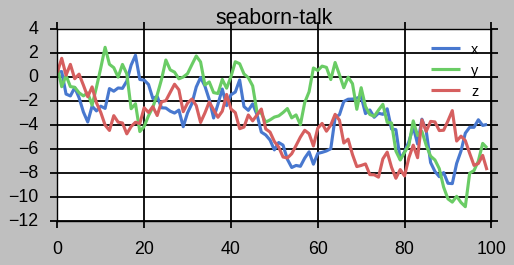

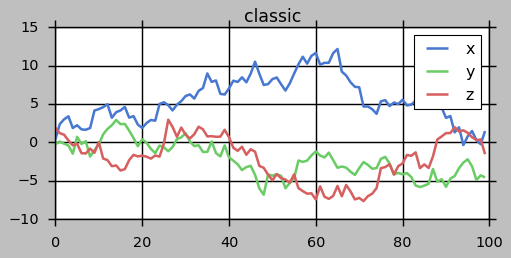

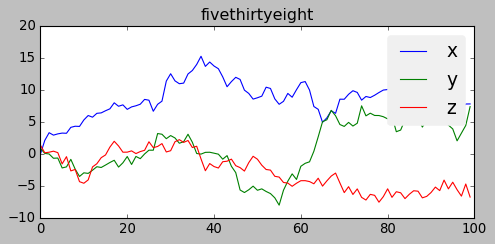

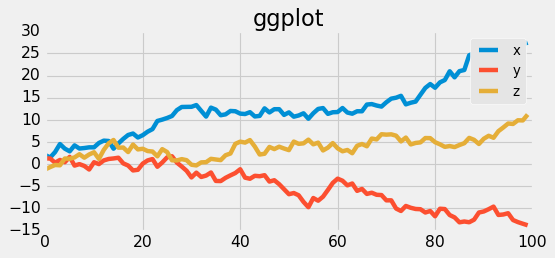

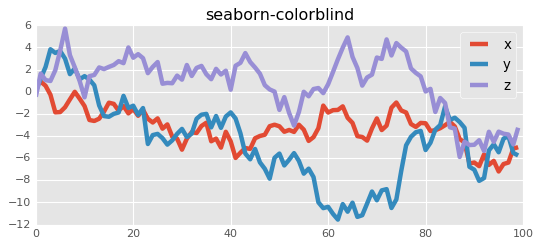

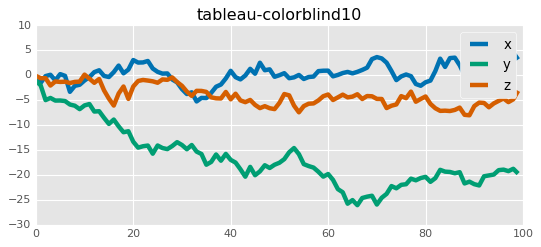

In [96]:
# Changez le style !


# Style playing
for style in styles:
    plt.figure(figsize=(7,3))

    plt.plot(np.random.randn(100).cumsum(), label="x")
    plt.plot(np.random.randn(100).cumsum(), label="y")
    plt.plot(np.random.randn(100).cumsum(), label="z")
    plt.title(style)
    plt.style.use(style)

    plt.legend()
    plt.show()

Styles légers:
seaborn-white
seaborn-darkgrid
dark_background
fivethirtyeight

## Exercise 4 : Changez les parametres 

Matplotlib propose un ensemble de parametres par défaut qui sont bien pratiques. Mais souvent on se retrouve à répéter toujours la meme instruction. 

Le cas typique est la taille par défaut d'une figure. Lorsque nous sommes sur notre notebook nous avons regulirement besoin d'une figure de plus grand taille.

Les parametres sont stockés dans un `dict()`, ce dictionnaire est l'attribut `rcParams` de `plt`.

- Explorez rapidement ce dictionnaire.
- Changez le parametre de la taille de figure par défaut vers qq chose qui vous convient.  
- Nous allons par la suite utiliser le style seaborn, mais le background attire trop l'oeil. Changez le facecolor. Comme par exemple la couleur RGB `#f2f2f2` ou alors `#f1f3f9`.

Voici un exemple de ce que cela peut donner.

![exo4](ex4.png)

<img src='img/ex4.png'>

In [111]:
# Changez les parametre par défaut

rcParams['figure.figsize']=(12,6)

In [140]:
rcParams

/home/campus-5/anaconda3/lib/python3.7/site-packages/IPython/lib/pretty.py:689: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [182]:
# rcParams['xtick.color']='blue'
# rcParams['legend.title_fontsize']=45
# rcParams['legend.shadow']=True
# rcParams['figure.subplot.left']=.1
# rcParams['figure.subplot.right']=.5
# rcParams['lines.scale_dashes']=True

plt.rcParams.update(plt.rcParamsDefault)

Figure(1400x600)


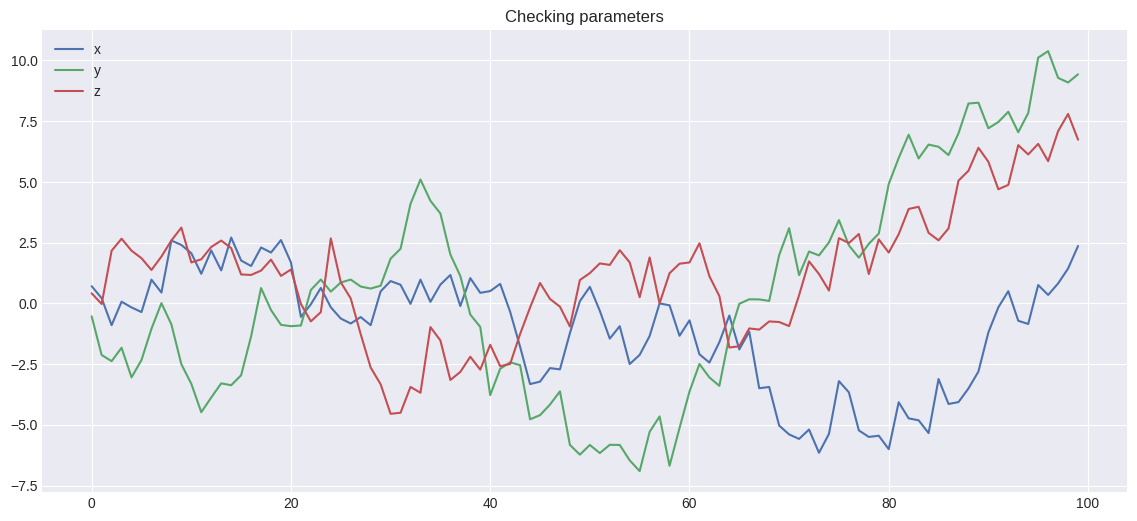

In [179]:
# Vérifier l'échange de vos parametrage de Matplotlib
ax = plt.figure(figsize=(14,6))

plt.plot(np.random.randn(100).cumsum(), label="x")
plt.plot(np.random.randn(100).cumsum(), label="y")
plt.plot(np.random.randn(100).cumsum(), label="z")
plt.title("Checking parameters")
plt.style.use('seaborn-darkgrid')
print(ax)
plt.legend()
plt.show()

## Plotter avec l'interface Artist.

`pyplot` est une interface qui permet de travailler sur des cas de visualisation faciles. 
Mais des que nous souhaitons aller plus loin, l'interface trouve ses limites.

Le cas le plus concret est lorsque nous souhaitons tracer plusieurs graphiques (a.k.a. `axes`) dans le meme canvas (a.k.a. `figure`).

Pour tracer des subplots, nous devons travailler directement avec les objets de la classe `Figure` et `Axes`. Ce que l'on appelle bosser directement sur les objets de la couche *Artist*. 

Voici un exemple :

```python
    fig = plt.figure() # créer un objet de type Figure (canvas)
    ax = fig.add_subplot(nrows, ncols, plot_number) # creér un objet de type Axes
```

- `nrows` et `ncols` decoupe la figure en (`nrows` \* `ncols`) sub-axes,  
- `plot_number` est l'identifiant d'un plot particulier. 

**Remarque** `plot_number` commence à 1, et fini à `nrows` \* `ncols` 

L'image suivante devrait vous aider à comprendre la logique des subplots :

![subplots](subplots.png "source: IBM")


## Exercise 5 : Faire des subplots

Reproduisez avec exactitude la figure suivante.

![exo5](ex5.png)

Quelques pistes :

- Il s'agit d'une grille 2x2
- Pour le texte sur 4ème axes rajoutez du texte à l'aide de la fonction `text` qui se trouve dans l'objet du type `Axes`.
- La couleur du texte est `green`

https://matplotlib.org/3.1.1/gallery/pyplots/text_commands.html#sphx-glr-gallery-pyplots-text-commands-py 

<img src='img/subplots.png'>

<img src='img/ex5.png'>

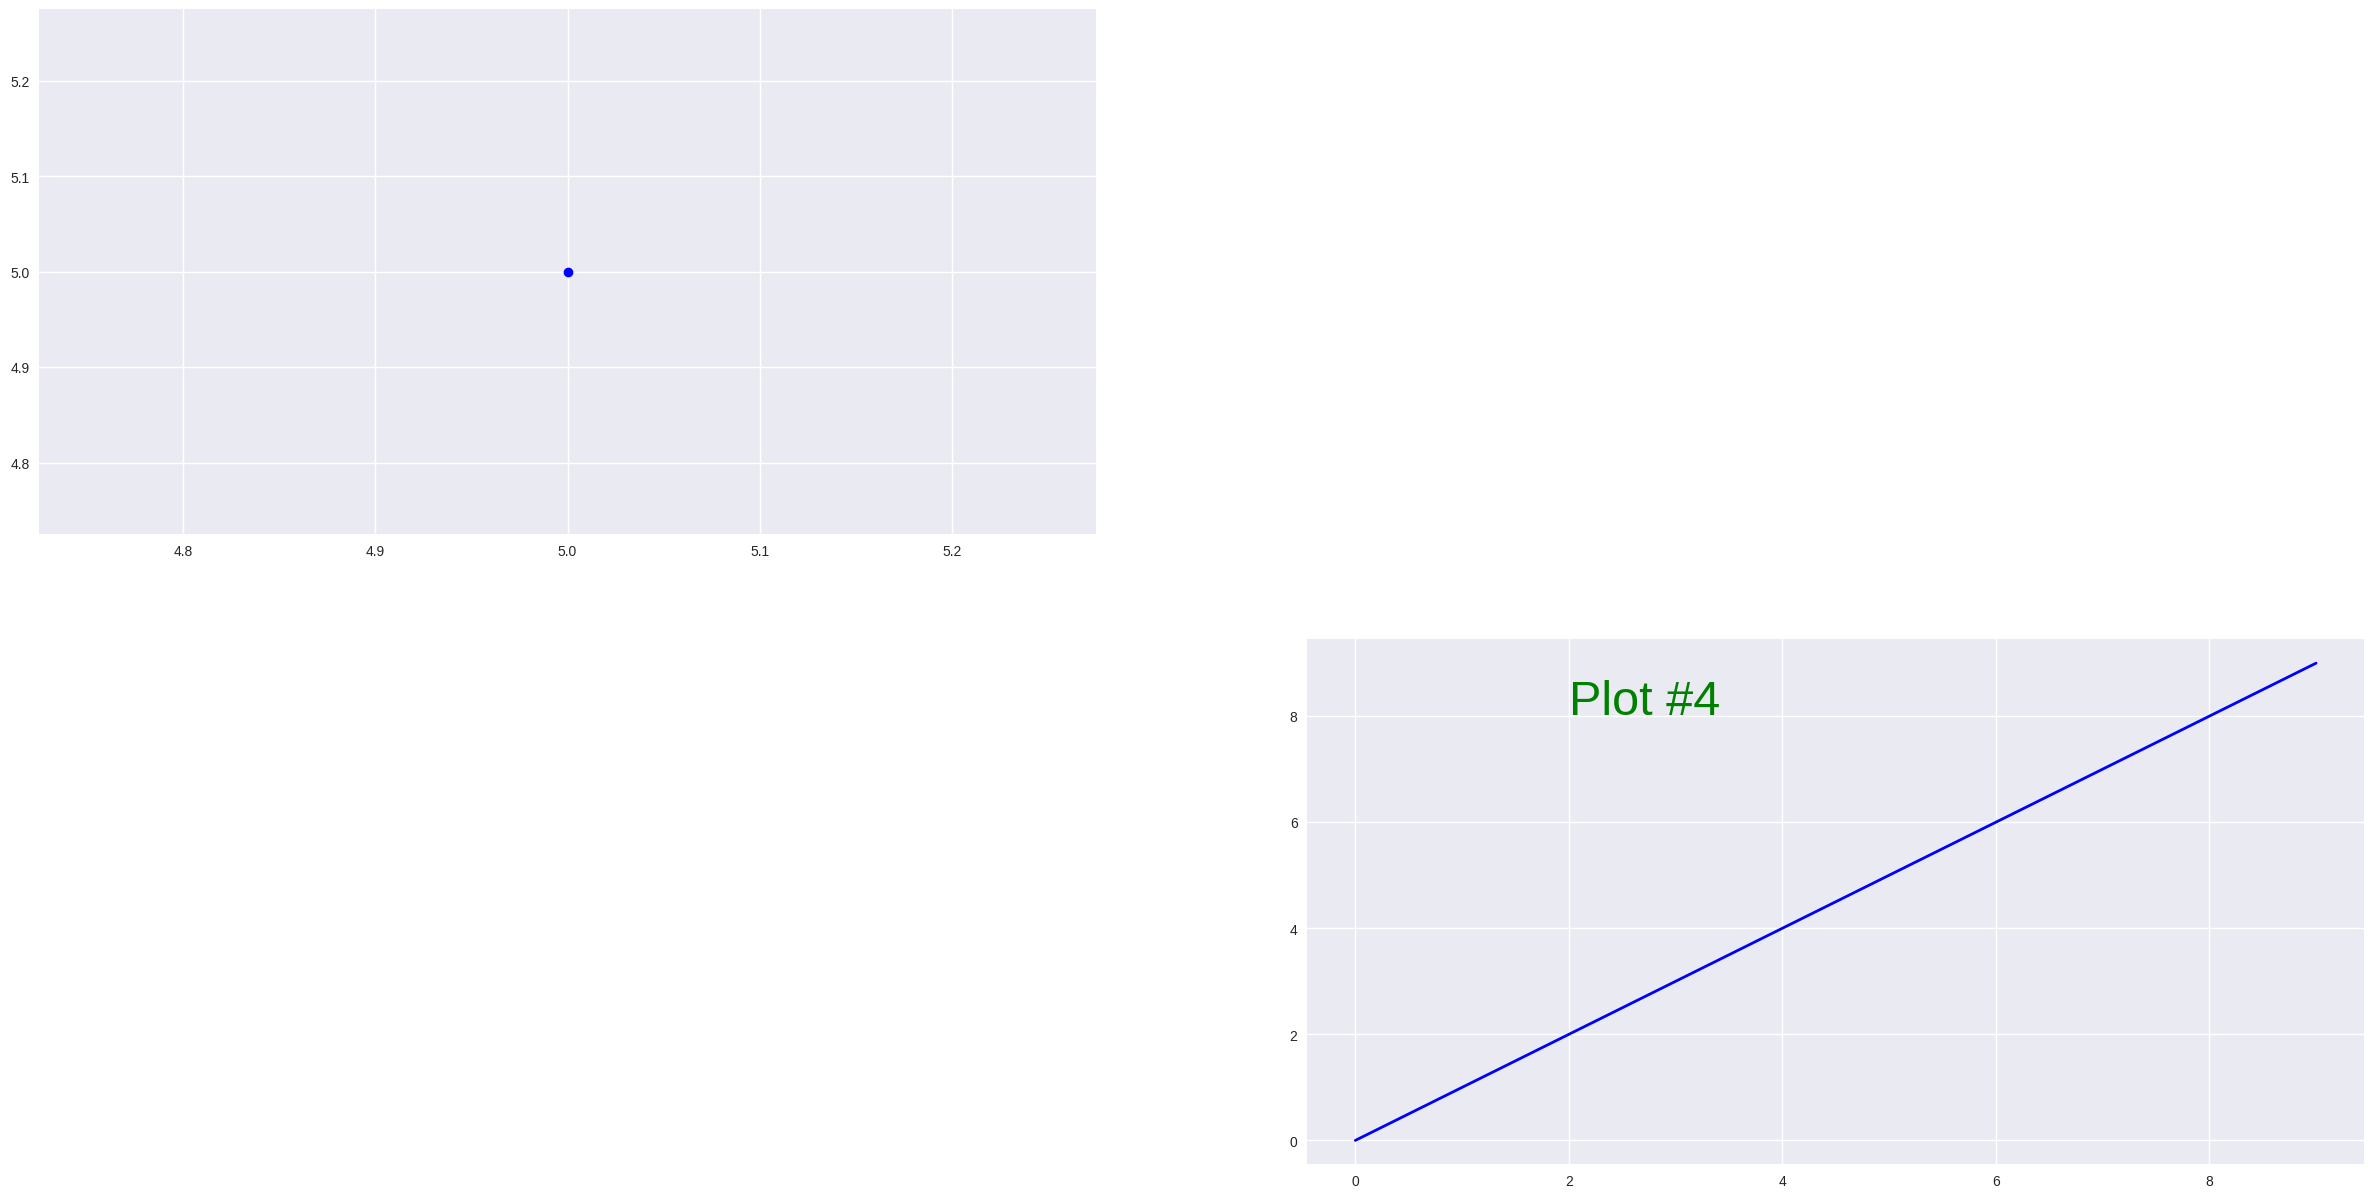

In [271]:
plt.style.use('seaborn')
def f(x):
    return x
x=range(0,10)

fig=plt.figure(figsize=(30,15))


ax1=fig.add_subplot(221)


ax2=fig.add_subplot(224)

ax1.plot(5,5,'bo')
ax2.plot(f(x),color='blue',linewidth=2)
ax2.xaxis.set(ticks=range(0,10,2))
ax2.yaxis.set(ticks=range(0,10,2))
ax2.text( 2,8.7, 'Plot #4',
        verticalalignment='top', horizontalalignment='left',
        color='green', fontsize=35)

plt.show()

## Exercise 6 : 'Traduction' de pyplot à artist

Traduisez le code suivant vers l'interface objet de matplotlib

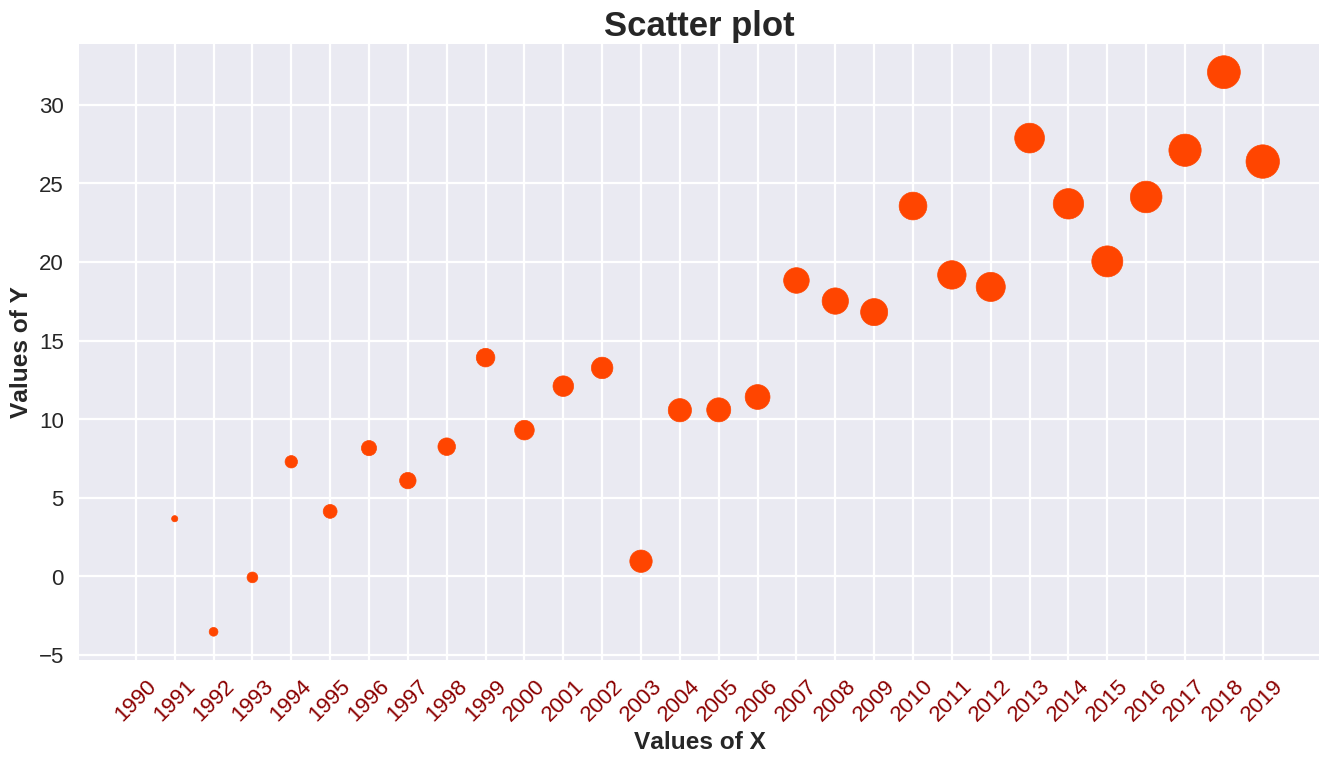

In [269]:
# x = np.arange(30)
# y = np.arange(30) + 3*np.random.randn(30)

# fig=plt.figure(figsize=(30,15))
# ax=fig.add_subplot(111)
# plt.scatter(x , y , color="orangered", s=20*x)

# plt.title("Scatter plot", fontsize=18, fontweight="bold")
# plt.xlabel("Values of X", fontweight="bold")
# plt.ylabel("Values of Y", fontweight="bold")
# plt.xticks(x, labels=x + 1990, rotation=45, color="darkred")
# plt.show()

x = np.arange(30)
y = np.arange(30) + 3*np.random.randn(30)

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)

ax.scatter(x , y , color="orangered", s=20*x)

ax.set_title("Scatter plot", fontsize=25, fontweight="bold")
ax.set_xlabel("Values of X", fontweight="bold")

ax.set_ylabel("Values of Y", fontweight="bold")

# ax.xaxis.set(ticks=x)
ax.xaxis.set_ticks(x)

ax.set_xticklabels(x+1990,rotation=45,color='darkred')
# ax.tick_params(axis='x',labelrotation=45,labelcolor='darkred')

plt.show()

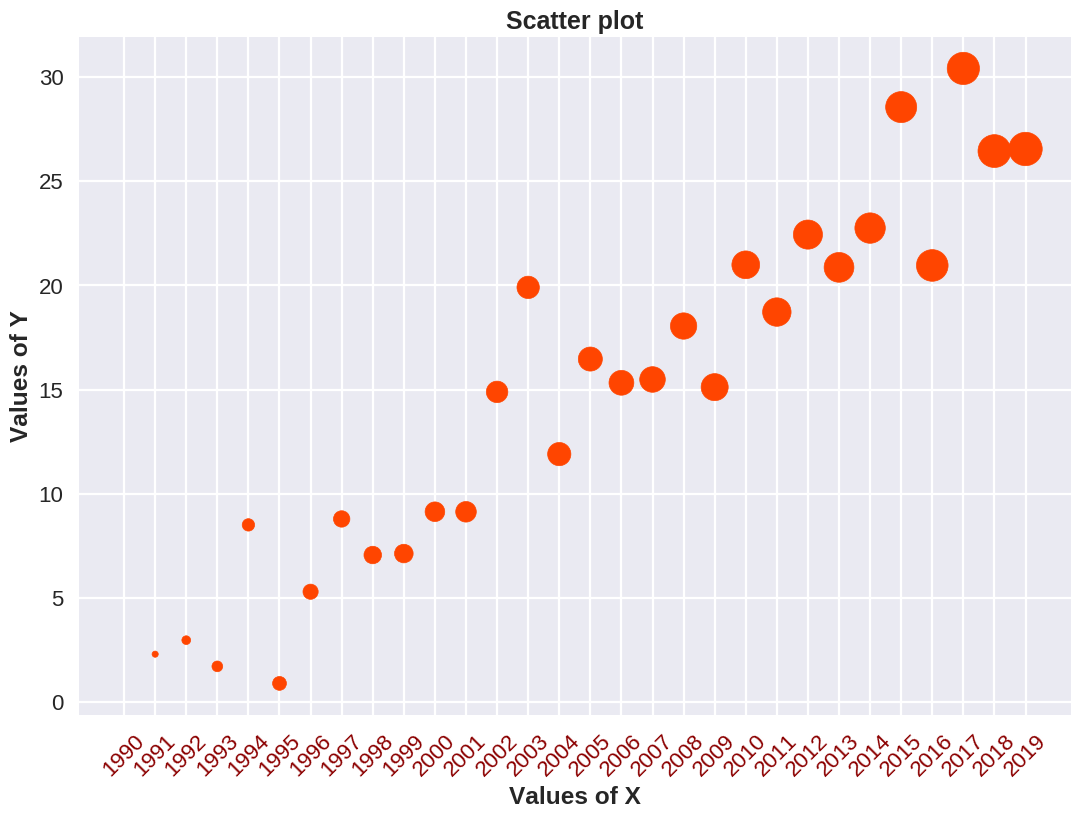

In [ ]:
# Utiliser la méthode artiste

# Pour aller plus loin

- L'histoire de Matplotlib
    - https://matplotlib.org/users/history.html
 
- Les styles, le parametrage et les couleurs
    - https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
    - https://matplotlib.org/tutorials/introductory/customizing.html
    - https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
- La difference entre pyplot and axes
	- https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl
    
- The Artist interface
    - https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

- Exemple d'une entreprise qui fait de la visu son coeur métier
    - https://www.darkhorseanalytics.com/portfolio-all
    - http://babynames.dha.io/
